### Easy + Medium

In [29]:
from pathlib import Path
import zipfile
import os
import pandas as pd


def extract(zip_folder, language):
    extensions = {
        'Python': ['.py'],  # +
        'C++': ['.cpp', '.h', '.hpp'],  # +
        'JavaScript': ['.js'],  # +
        'Java': ['.java'],  # +
        'Yaml': ['.yaml', '.yml'],
        'Bash': ['.sh'],
        'Markdown': ['.markdown', '.md'],
        'C': ['.c', '.h'],  # +
        'Kotlin': ['.kt'],  # +
        'Haskel': ['.hs'],  # +

    }

    file_extensions = extensions.get(language, [])
    if not file_extensions:
        return []

    data_lst = []
    zip_folder_path = Path(zip_folder)

    for zip_path in zip_folder_path.glob('*.zip'):
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            files = [f for f in zip_ref.namelist() if any(f.lower().endswith(ext.lower()) for ext in file_extensions)]
            for file_name in files:
                file_path = zip_folder_path / file_name
                file_path.parent.mkdir(parents=True, exist_ok=True)
                try:
                    zip_ref.extract(file_name, zip_folder_path)
                    with open(file_path, 'r', encoding='utf-8') as file:
                        code_content = file.read()
                    data_lst.append({'language': language, 'code': code_content})
                except UnicodeDecodeError:
                    pass
                except Exception as e:
                    pass
                finally:
                    if file_path.exists():
                        os.remove(file_path)

    df = pd.DataFrame(data_lst, columns=['language', 'code'])
    return df

In [30]:
python = extract('../scripts/python', 'Python')
print(len(python))

6634


In [31]:
js = extract('../scripts/js', 'JavaScript')
print(len(js))

4389


In [32]:
cpp = extract('../scripts/cpp', 'C++')
print(len(cpp))

5325


In [33]:
java = extract('../scripts/java', 'Java')
print(len(java))

6215


In [34]:
yaml = extract('../scripts/yaml', 'Yaml')
print(len(yaml))

6585


In [35]:
c = extract('../scripts/c', 'C')
print(len(c))

7856


In [36]:
kotlin = extract('../scripts/kotlin', 'Kotlin')
print(len(kotlin))

4592


In [37]:
markdown = extract('../scripts/yaml', 'Markdown')
print(len(markdown))

8878


In [38]:
haskel = extract('../scripts/haskell', 'Haskel')
print(len(haskel))

4590


In [39]:
bash = extract('../scripts/bash', 'Bash')
print(len(bash))

2774


In [40]:
other_src = pd.read_csv('../scripts/eng/english.csv')
other = other_src[['text']].copy()
other.rename(columns={'text': 'code'}, inplace=True)
other['language'] = 'Other'
print(len(other))

10000


In [41]:
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns

data = pd.concat([python, cpp, js, java, yaml, c, kotlin, haskel, markdown, bash, other], ignore_index=True)
# data = pd.concat([python, cpp, js, java, yaml, kotlin, other], ignore_index=True)

data.dropna(inplace=True)

print(f'Size: {len(data)}')

x = data['code']
y = data['language']

Size: 67838


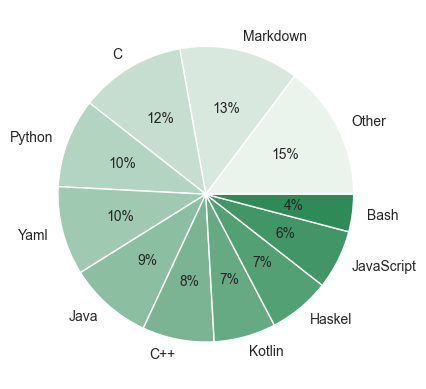

In [42]:
language_counts = data['language'].value_counts()
languages = language_counts.index.tolist()
number_of_reviews = language_counts.tolist()

colors = sns.light_palette('seagreen', len(languages))

plt.pie(number_of_reviews, labels=languages, colors=colors, autopct='%.0f%%')
plt.show()

In [43]:
def save_files(language, n, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    filtered_data = data[data['language'] == language]

    sampled_data = filtered_data.sample(n=min(n, len(filtered_data)),
                                        random_state=1)

    # Save each file
    for i, row in enumerate(sampled_data.itertuples(), start=1):
        file_path = os.path.join(output_dir, f"{language}_sample_{i}.txt")
        with open(file_path, 'w', encoding='utf-8') as file:
            file.write(row.code)

# save_files('JavaScript', 2, 'files')

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
x_vectorized = vectorizer.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_vectorized, y, test_size=0.2, random_state=42)

In [45]:
# model = CatBoostClassifier(iterations=1500, learning_rate=0.15, verbose=True, task_type='GPU')
# model.fit(x_train, y_train)
# 
# predictions = model.predict(x_test)
# accuracy = accuracy_score(y_test, predictions)
# print(f'Accuracy: {accuracy * 100:.2f}%')

In [46]:
model = LogisticRegression(verbose=True, solver='saga')
model.fit(x_train, y_train)

predictions = model.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')

convergence after 24 epochs took 10 seconds
Accuracy: 93.09%


In [47]:
import joblib

joblib.dump((vectorizer, model), 'model.pkl')

['model.pkl']

In [48]:
my_x_test = [("model = LogisticRegression(verbose=True)"
              "model.fit(x_train, y_train)"
              "predictions = model.predict(x_test)"
              "accuracy = accuracy_score(y_test, predictions)"
              "print(f'Accuracy: {accuracy * 100:.2f}%')"),
             ("void *operator new(size_t n) {"
              "    if (!mem) {"
              "        mem = static_cast<int8_t *>(malloc(MAX_MEM));"
              "    }"
              "    size_t pos = alignUp(m_pos, alignof(std::max_align_t));"
              ""
              "    if (pos + n > MAX_MEM) {"
              "        throw std::bad_alloc();"
              "    }"
              ""
              "    m_pos = pos + n;"
              "    return mem + pos;"
              "}"),
             (
                 "Karim Khan did not provide specific details of attempts to interfere in the ICC’s work, but he noted a clause in the court’s foundational treaty that made any such interference a criminal offence. If the conduct continued, he added, “my office will not hesitate to act”."

                 "The prosecutor did not say who had attempted to intervene in the administration of justice, or how exactly they had done so."

                 "Now, an investigation by the Guardian and the Israeli-based magazines +972 and Local Call can reveal how Israel has run an almost decade-long secret “war” against the court. The country deployed its intelligence agencies to surveil, hack, pressure, smear and allegedly threaten senior ICC staff in an effort to derail the court’s inquiries."),
             ("package com.core.example.arrays;"

              "import java.util.ArrayList;"
              "import java.util.List;"

              "public class ArrayListToArrayConversion {"

              "	public static void main(String[] args) {"
              "		List<Integer> al = new ArrayList<Integer>();"
              "		al.add(10);"
              "		al.add(20);"
              "		al.add(30);"
              "		al.add(40);"
              "		al.add(50);"

              "		Integer[] arr = new Integer[al.size()];"
              "		arr = al.toArray(arr);"
              "		for(Integer x: arr) {"
              "		System.out.print(x + " ");"
              "		}"
              "	}"
              "}"),
             ("language: python"
              "python: 2.7"
              ""
              "# Use the new container infrastructure"
              "sudo: false"
              ""
              "# Install ansible"
              "addons:"
              "  apt:"
              "    packages:"
              "    - python-pip"
              ""
              "install:"
              "  # Install ansible"
              "  - pip install ansible"
              ""
              "  # Check ansible version"
              "  - ansible --version"
              ""
              "  # Create ansible.cfg with correct roles_path"
              "  - printf '[defaults]\nroles_path=../' >ansible.cfg"
              ""
              "script:"
              "  # Basic role syntax check"
              "  - ansible-playbook tests/test.yml -i tests/inventory --syntax-check"
              ""
              "notifications:"
              "  webhooks: https://galaxy.ansible.com/api/v1/notifications/")]

gpt_x = [
    "print('Hello, world!')",  # Python
    "#include<iostream>\nint main() { std::cout << 'Hello, world!' << std::endl; return 0; }",  # C++
    "console.log('Hello, world!');",  # JavaScript
    "public class Main { public static void main(String[] args) { System.out.println('Hello, world!'); } }",  # Java
    ("install:"
     "  # Install ansible"
     "  - pip install ansible"
     ""
     "  # Check ansible version"
     "  - ansible --version"),  # Yaml
    "echo Hello, world!",  # Bash
    "# Hello, world!",  # Markdown
    "#include<stdio.h>\nint main() { printf('Hello, world!\\n'); return 0; }",  # C
    "fun main() { println('Hello, world!') }",  # Kotlin
    "main = putStrLn 'Hello, world!'",  # Haskell
]

my_x_processed = vectorizer.transform(my_x_test)
gpy_x_processed = vectorizer.transform(gpt_x)

my_preds = model.predict(my_x_processed)
print(my_preds)
gpt_preds = model.predict(gpy_x_processed)
print(gpt_preds)

['Python' 'C++' 'Markdown' 'Java' 'Yaml']
['Python' 'C++' 'JavaScript' 'Java' 'Yaml' 'Bash' 'Markdown' 'C' 'Kotlin'
 'Haskel']


In [49]:
!C:\Users\dv\AppData\Local\Programs\Python\Python312\python.exe lang_detector.py test.py

Python


### Hard